# MAROUANE ZAIZOUNE
# Data science Internship
# LetsGrowMore
# Intermediate Level
# Task 6: Prediction using Decision Tree Algorithm
Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

**Dataset Description** 

The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Attribute Information:

1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm

Iris flower can be divided into 3 species as per the length and width of their Sepals and Petals:

1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica

## Loading the dataset

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Shape of Dataset
df.shape

(150, 6)

In [4]:
# Dataset Statistical Summary
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Data cleaning

In [5]:
# Checking Null Values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# Checking duplicates
df.duplicated().sum()

0

## Data visualization

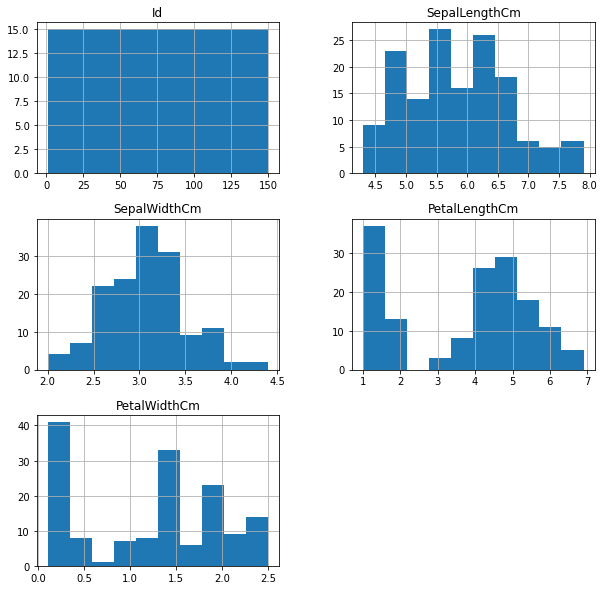

In [7]:
# Display histograms of the entire dataset

df.hist(figsize=(10,10))
plt.show()

In [8]:
# To display no. of samples on each class.
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

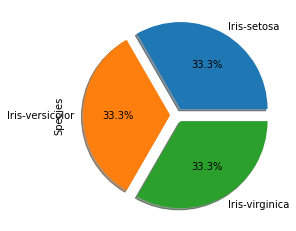

In [9]:
# Pie plot to show the overall types of Iris classifications
df['Species'].value_counts().plot(kind = 'pie',  autopct = '%1.1f%%', shadow = True, explode = [0.08,0.08,0.08])

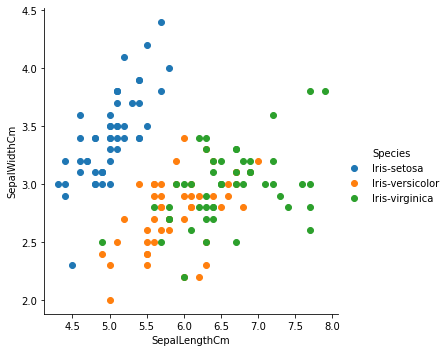

In [10]:
sns.FacetGrid(df, hue="Species", size=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

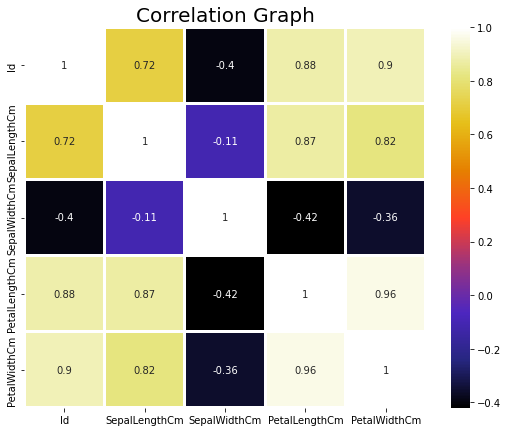

In [11]:
# Correlation Heatmap
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cmap='CMRmap',annot=True,linewidths=2)
plt.title("Correlation Graph",size=20)
plt.show()

## Prediction

In [12]:
# Splitting dataset 
from sklearn.model_selection import train_test_split

features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X = df.loc[:, features].values   #defining the feature matrix
Y = df.Species

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 40,random_state=0)

In [14]:
# Importing some metrics for evaluating  models.
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [15]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

## Visualizing the decision tree

[Text(0.4, 0.9, 'petal length(cm) <= 2.35\ngini = 0.663\nsamples = 110\nvalue = [37, 32, 41]\nclass = Iris-virginica'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = Iris-setosa'),
 Text(0.5, 0.7, 'petal length(cm) <= 4.95\ngini = 0.492\nsamples = 73\nvalue = [0, 32, 41]\nclass = Iris-virginica'),
 Text(0.2, 0.5, 'petal width(cm) <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]\nclass = Iris-versicolor'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = Iris-versicolor'),
 Text(0.3, 0.3, 'sepal width(cm) <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-virginica'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(0.8, 0.5, 'petal width(cm) <= 1.75\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]\nclass = Iris-virginica'),
 Text(0.7, 0.3, 'petal width(cm) <= 1.65\ngini = 0.375\nsamples = 

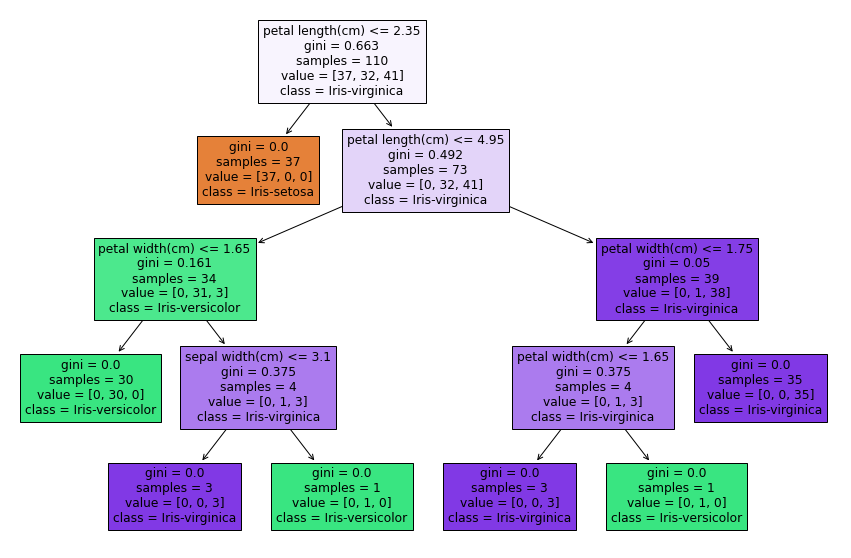

In [16]:
from sklearn import tree
feature_name =  ['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
class_name= df.Species.unique()
plt.figure(figsize=(15,10))
tree.plot_tree(model_dt, filled = True, feature_names = feature_name, class_names= class_name)

## Evaluation

In [17]:
y_pred = model_dt.predict(X_test)

In [18]:
print("Accuracy: ",accuracy_score(y_test, y_pred))

Accuracy:  0.975


In [19]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        40
      macro avg       0.97      0.98      0.97        40
   weighted avg       0.98      0.97      0.98        40



## Predicting the output class for random values for petal and sepal length and width

Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 5cm, 3.6cm, 1.4cm and 0.2cm respectively

In [20]:
model_dt.predict([[5, 3.6, 1.4 , 0.2]])

array(['Iris-setosa'], dtype=object)

Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 9cm, 3.1cm, 5cm and 1.5cm respectively

In [21]:
model_dt.predict([[9, 3.1, 5, 1.5]])

array(['Iris-virginica'], dtype=object)